# Laboration 3 - Rapport
Sebastian Petersson  
*SebastianPetersson* on **Github**

## Inledning

I denna rapport undersöks hur datapunkterna i unlabelled_data.csv kan klassificeras utifrån en rät linje och hur linjens placering påverkar resultatet.   För att visualisera data används matplotlib, medan datahanteringen görs manuellt utan pandas, i syfte att förstå processen från grunden.

## Utförande

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
data_path = rf"C:\Users\Sebastian!\Documents\Programmering\python-programmering-SEBASTIAN-PETERSSON\Labs\Labb_3"
write_path = rf"{data_path}\Labelled_data_rapport.csv"


Jag började med att importera de nödvändiga biblioteken matplotlib och numpy. Sedan skapade jag variabler som innehåller sökvägar till platsen där unlabelled_data.csv finns, samt där Labelled_data.csv skall skrivas.

In [98]:

def label_datapoints(k, m, x, y):
    
    if y > k*x + m:
        label = 1
    else:
        label = 0
    return label


data_points = pd.read_csv(rf"{data_path}\unlabelled_data.csv", header = None, names = ['x', 'y'])
data_points['My_line'] = data_points.apply(lambda point: label_datapoints(-1, 0, point['x'], point['y']), axis = 1)
data_points['f(x)'] = data_points.apply(lambda point: label_datapoints(-0.489, 0, point['x'], point['y']), axis = 1)
data_points['g(x)'] = data_points.apply(lambda point: label_datapoints(-2, 0.16, point['x'], point['y']), axis = 1)
data_points['h(x)'] = data_points.apply(lambda point: label_datapoints(800, -120, point['x'], point['y']), axis = 1)

#Writes resulted labels in csv-file.
with open(rf"{write_path}", 'w', newline='') as labelledData:
    data_points.to_csv(labelledData, index = False)



Jag skapar sedan en funktion som används för att klassificera varje datapunkt utifrån linjernas k- och m-värden. 

Jag använder pandas-funktionen .apply() för att iterera rad för rad i DataFrame:en. För varje rad skickas k, m, x och y in i funktionen label_datapoints, och det returnerade värdet sparas som nya kolumner i data_points. 
Resultaten som sparats i data_points skrivs till write_path, vilket är förinställt till Labelled_data.csv. 

Slutligen visualiserar jag de olika linjerna i en graf tillsammans med datapunkterna med hjälp av matplotlib. Resultaten av linjernas klassificeringar printas sedan ut.

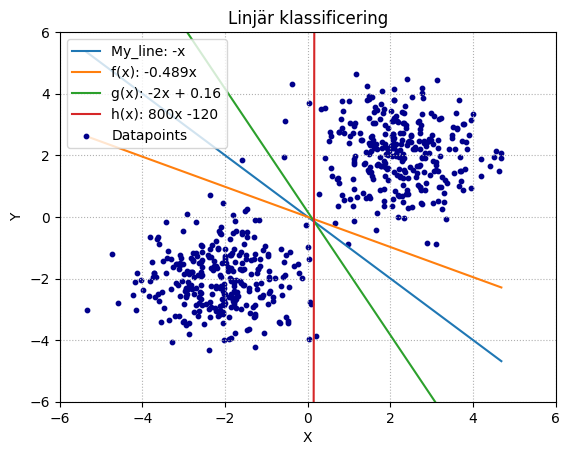

In [99]:

lines = {
    'My_line: -x': (-1, 0),
    'f(x): -0.489x': (-0.489, 0),
    'g(x): -2x + 0.16': (-2, 0.16),
    'h(x): 800x -120': (800, -120)
    }
#Creating x & y values to plot the lines.
x_min, x_max = data_points['x'].min(), data_points['x'].max()
x_values = [x_min, x_max]
for name, (k, m) in lines.items():
    y_values = [k*x + m for x in x_values]
    plt.plot(x_values, y_values, label = name)

plt.scatter(data_points['x'], data_points['y'], color = 'darkblue', s = 10, label = 'Datapoints')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.title("Linjär klassificering")
plt.grid(True, linestyle = ':')
plt.legend(loc = "upper left")
plt.show()

# Resultat och diskussion

### Klassificering och avvikelse från perfekt balans

In [127]:
for col in data_points.columns[2:]:
    label_count = data_points[col].value_counts()
    proportions = data_points[col].value_counts(normalize=True)
    deviation = (proportions - 0.5).abs()*100
    print(f"\n{col}:")
    print(f" 1: {label_count.get(1, 0)} 0: {label_count.get(0, 0)}")
    print(f"{col} har en avvikelse på {deviation.loc[1]:.3f}%.")



My_line:
 1: 302 0: 298
My_line har en avvikelse på 0.333%.

f(x):
 1: 301 0: 299
f(x) har en avvikelse på 0.167%.

g(x):
 1: 301 0: 299
g(x) har en avvikelse på 0.167%.

h(x):
 1: 302 0: 298
h(x) har en avvikelse på 0.333%.


**Samtliga** linjer delar upp datapunkterna relativt jämnt. För att uttrycka hur nära en perfekt balans (50/50) uppdelningen är beräknas avvikelsen som den absoluta skillnaden mellan den faktiska andelen datapunkter i varje kategori och 0,5 *(uttryckt i procent)*. Ju mindre avvikelse, desto mer balanserad är uppdelningen.

Resultatet visar att linjerna *f(x)* och *g(x)* har en avvikelse på 0.167 %, medan linjerna *My_line* och *h(x)* har en aningen större avvikelse på 0.33%.  
Därav gör *f(x)* och *g(x)* ett bättre jobb på att dela upp datapunkterna jämnt.

Huruvida dessa linjer i en reell situation faktiskt skulle vara mer användbara beror på olika faktorer. Vad representerar linjen? I vårt fall är samtliga linjer påhittade, vilket egentligen gör att ingen av linjerna har någon verklig betydelse.
Vi skulle kunna skapa ett oändligt antal linjer och beräkna avvikelse för dem också, men utan ytterligare kriterier finns ingen tydlig anledning att föredra någon särskild linje. Om syftet faktiskt är att dela upp ett dataset så jämnt som möjligt endast beroende på position i en graf, så visst, då går det att hitta flera linjer som är optimala!